<a href="https://colab.research.google.com/github/lerlerchan/Practical-Discrete-Mathematics/blob/master/opencv_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Pillow is a popular Python library for image processing
!pip install pillow

Scale the image

In [ ]:

#get the info
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Scale the image
new_size = (50, 50)  # Replace with your desired size
scaled_img = img.resize(new_size)

# Display the scaled image
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')
plt.show()

Transpose the image 90 degree

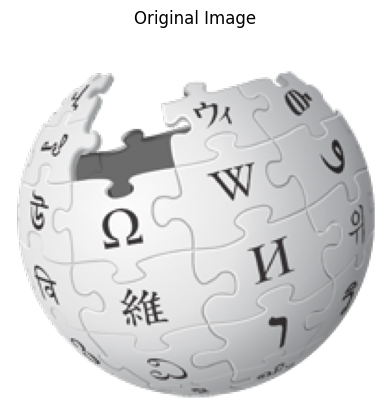

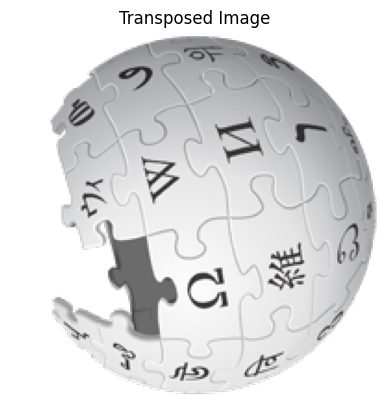

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load an image
url = 'https://upload.wikimedia.org/wikipedia/commons/6/63/Wikipedia-logo.png'  # Wikipedia logo URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Transpose the image by 90 degrees
transposed_img = img.transpose(Image.ROTATE_90)

# Display the transposed image
plt.imshow(transposed_img)
plt.title('Transposed Image')
plt.axis('off')
plt.show()

remove the background of an image. maintain the character

In [ ]:
!pip install rembg pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
from rembg import remove
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load an image
url = 'https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de'  # Wikipedia logo URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Remove the background
img_no_bg = remove(img)

# Display the image without background
plt.imshow(img_no_bg)
plt.title('Image Without Background')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'onnxruntime'

In [ ]:
!pip install opencv-python-headless pillow numpy

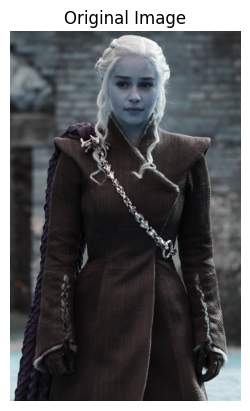

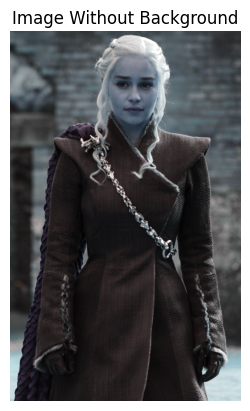

In [ ]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load an image
url = 'https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de'  # Wikipedia logo URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

# Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Remove the background
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
mask = cv2.bitwise_not(thresh)

# Create 3-channel alpha mask
alpha = cv2.merge([mask, mask, mask])

# Add alpha channel to the image
b, g, r = cv2.split(img)
rgba = [b, g, r, mask]
img_no_bg = cv2.merge(rgba, 4)

# Display the image without background
plt.imshow(cv2.cvtColor(img_no_bg, cv2.COLOR_BGRA2RGBA))
plt.title('Image Without Background')
plt.axis('off')
plt.show()

In [ ]:
# Step 1: Install the required library
!pip install rembg pillow matplotlib

# Step 2: Download the image
import requests

url = "https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de"
response = requests.get(url)

# Save the image locally
with open("input_image.jpg", "wb") as file:
    file.write(response.content)

# Step 3: Remove the background
from rembg import remove
from PIL import Image

input_path = "input_image.jpg"
output_path = "output_image.png"

# Open the image
with open(input_path, "rb") as inp_file:
    input_image = inp_file.read()

# Remove the background
output_image = remove(input_image)

# Save the resulting image
with open(output_path, "wb") as out_file:
    out_file.write(output_image)

# Step 4: Display the result
import matplotlib.pyplot as plt

# Load and display the original and processed images
original = Image.open(input_path)
result = Image.open(output_path)

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Background Removed")
plt.imshow(result)
plt.axis("off")

plt.show()


ModuleNotFoundError: No module named 'onnxruntime'

Alternative method

In [ ]:
!pip install mediapipe opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 30.0 MB/s eta 0:00:00


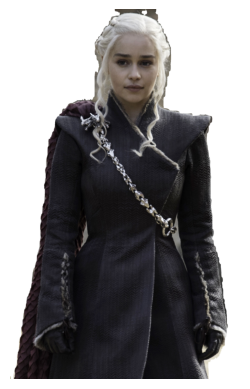

In [ ]:

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# Read the image
image = cv2.imread("SUC_logo.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Display the result
plt.imshow(image_no_bg)
plt.axis("off")
plt.show()


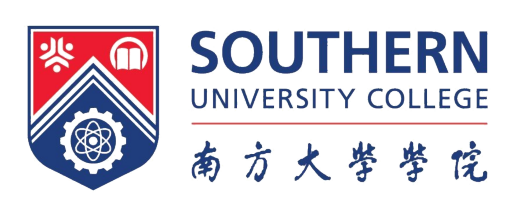

In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread("SUC_logo.jpg")

# Convert to RGBA
image_rgba = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

# Create a mask for white pixels (allowing some tolerance)
# White is [255, 255, 255] in BGR
lower_white = np.array([240, 240, 240])
upper_white = np.array([255, 255, 255])
white_mask = cv2.inRange(image, lower_white, upper_white)

# Set the alpha channel to transparent where white is detected
image_rgba[:, :, 3] = 255  # First set all pixels to opaque
image_rgba[white_mask > 0, 3] = 0  # Then make white pixels transparent

# Save the image
cv2.imwrite("logo_transparent.png", image_rgba)

# Optional: display the image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image_rgba, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()

Combine 2 images side by side vertically

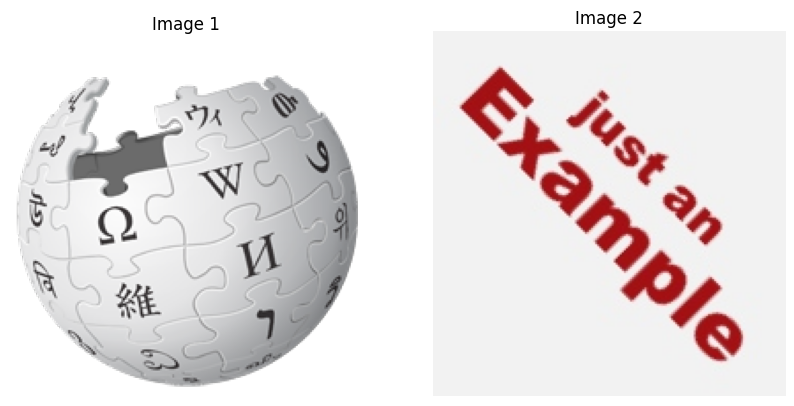

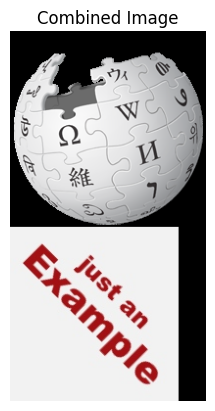

In [ ]:
!pip install pillow

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the images
url1 = 'https://upload.wikimedia.org/wikipedia/commons/6/63/Wikipedia-logo.png'  # First image URL
url2 = 'https://upload.wikimedia.org/wikipedia/commons/a/a9/Example.jpg'  # Second image URL

response1 = requests.get(url1)
img1 = Image.open(BytesIO(response1.content))

response2 = requests.get(url2)
img2 = Image.open(BytesIO(response2.content))

# Display the original images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')

plt.show()

# Combine the images vertically
width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (width, total_height))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

# Display the combined image
plt.imshow(combined_img)
plt.title('Combined Image')
plt.axis('off')
plt.show()

Change image to gray tone

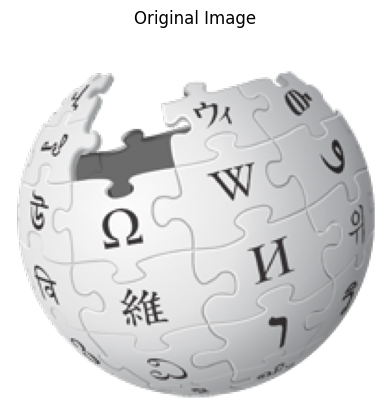

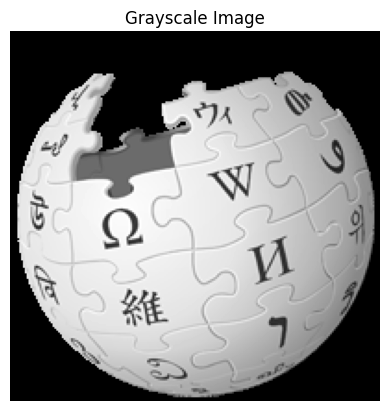

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load an image
url = 'https://upload.wikimedia.org/wikipedia/commons/6/63/Wikipedia-logo.png'  # Wikipedia logo URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to grayscale
gray_img = img.convert('L')

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()